## Preliminary settings

In order to plot fields, we run the following commands:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

We import the math library:

In [2]:
import math

The modules to import for dealing with grids are:

In [3]:
from pygsf.mathematics.arrays import *
from pygsf.spatial.rasters.geotransform import *
from pygsf.spatial.rasters.fields import *

For calculating pathlines:

In [6]:
from pygsf.spatial.movements import interpolate_rkf

## Velocity field with circular motion

The example circular motion vector field has components:

**v** = y **i** - x **j**

as deriving from the equation:

**v** = - **z** x **r**

where **z** is the vertical vector, **r** the position vector and *x* the vector product.

In [7]:
k = 2 * math.pi

def z_func_fx(x, y):

    return k*y

def z_func_fy(x, y):

    return -k*x

The velocity field parameters for testing the results are:

v = w * r

w = v / r

|v| = sqrt(k^2*y^2 + k^2*x^2) = k * r

1 cycle -> 2 pi r

v = ds / dt -> ds = v * dt

2 pi r = v dt

2 pi r = v T -> T = 2 pi r / v = 2 pi / k

### geotransform and grid definitions

In [8]:
rows=100; cols=100

In [9]:
size_x = 1; size_y = 1

In [10]:
tlx = -50.0; tly = 50.0 

In [11]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

### vector field x-component

In [12]:
fx1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [13]:
print(fx1)

[[ 311.01767271  311.01767271  311.01767271 ...  311.01767271
   311.01767271  311.01767271]
 [ 304.7344874   304.7344874   304.7344874  ...  304.7344874
   304.7344874   304.7344874 ]
 [ 298.45130209  298.45130209  298.45130209 ...  298.45130209
   298.45130209  298.45130209]
 ...
 [-298.45130209 -298.45130209 -298.45130209 ... -298.45130209
  -298.45130209 -298.45130209]
 [-304.7344874  -304.7344874  -304.7344874  ... -304.7344874
  -304.7344874  -304.7344874 ]
 [-311.01767271 -311.01767271 -311.01767271 ... -311.01767271
  -311.01767271 -311.01767271]]


### vector field y-component

In [14]:
fy1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [15]:
print(fy1)

[[ 311.01767271  304.7344874   298.45130209 ... -298.45130209
  -304.7344874  -311.01767271]
 [ 311.01767271  304.7344874   298.45130209 ... -298.45130209
  -304.7344874  -311.01767271]
 [ 311.01767271  304.7344874   298.45130209 ... -298.45130209
  -304.7344874  -311.01767271]
 ...
 [ 311.01767271  304.7344874   298.45130209 ... -298.45130209
  -304.7344874  -311.01767271]
 [ 311.01767271  304.7344874   298.45130209 ... -298.45130209
  -304.7344874  -311.01767271]
 [ 311.01767271  304.7344874   298.45130209 ... -298.45130209
  -304.7344874  -311.01767271]]


### flow characteristics: magnitude and streamlines

To visualize the parameters of the flow, we calculate the geographic coordinates:

In [16]:
X, Y = gtToxyCellCenters(
    gt=gt1,
    num_rows=rows,
    num_cols=cols)

and the vector field magnitude:

In [17]:
magn = magnitude(
    fld_x=fx1, 
    fld_y=fy1)

Text(0, 0.5, 'y')

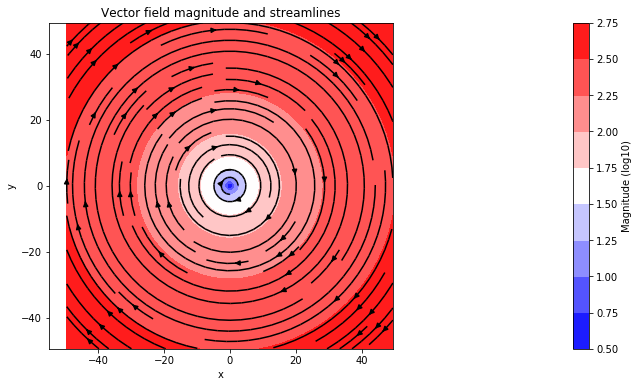

In [18]:
fig = plt.figure(figsize=(14, 6))

plt.contourf(X, Y, np.log10(magn), cmap="bwr")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude (log10)')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field magnitude and streamlines')
plt.xlabel('x')
plt.ylabel('y')


In [20]:
import math
from pygsf.spatial.vectorial.geometries import Point
from pygsf.spatial.rasters.geoarray import GeoArray

In [21]:
ga = GeoArray(
    inGeotransform=gt1,
    inProjection="undef",
    inLevels=[fx1, fy1])

In [22]:
time_increm = 1.0e-4

In [23]:
period = 2 * math.pi / k

In [24]:
number_of_cycles = 100

In [25]:
steps = number_of_cycles * (period / time_increm)
print (steps)

1000000.0


In [26]:
first_pt = Point(0, 20)

In [27]:
str_pt = first_pt
pts_x, pts_y = [first_pt.x], [first_pt.y]

for n in range(int(steps)):

    end_pt, error = interpolate_rkf(
    geoarray=ga, 
    delta_time=time_increm,
    start_pt=str_pt)
    
    if end_pt is None:
        break
        
    pts_x.append(end_pt.x)
    pts_y.append(end_pt.y)
    str_pt = end_pt
    
print (end_pt)

Point(-0.0000, 20.0000, 0.0000, 0.0000, '')


After 100 cycles the calculated point position is in the expected (initial) position: x=0, y=20.

Text(0, 0.5, 'y')

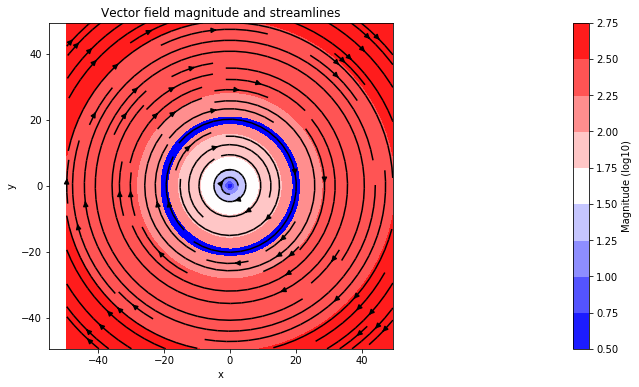

In [28]:
fig = plt.figure(figsize=(14, 6))

plt.contourf(X, Y, np.log10(magn), cmap="bwr")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude (log10)')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.scatter(pts_x, pts_y, color='b')
plt.axis("image")
plt.title('Vector field magnitude and streamlines')
plt.xlabel('x')
plt.ylabel('y')